Импорт необходимых библиотек.

In [63]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Парсинг результатов замеров из json-файла в DataFrame.

In [65]:
with open('../data/results.json', 'r') as f:
    data = json.load(f)

rows = []

for algorithm, datasets in data.items():
    for dataset_type, records in datasets.items():
        for record in records:
            row = {
                "algorithm": algorithm,
                "dataset": dataset_type,
                "size": record["size"],
                "comparisons": record["comparisons"],
                "time": record["time"]
            }
            rows.append(row)

df = pd.DataFrame(rows)


In [66]:
df.head(5)

,algorithm,dataset,size,comparisons,time
0,merge_sort,almost_sorted,100,723,0
1,merge_sort,almost_sorted,200,1537,0
2,merge_sort,almost_sorted,300,2742,0
3,merge_sort,almost_sorted,400,3816,0
4,merge_sort,almost_sorted,500,5085,0


Построение графика зависимости количества посимвольных сравнений от размера выборки для разных алгоритмов и разных типов выборок. 

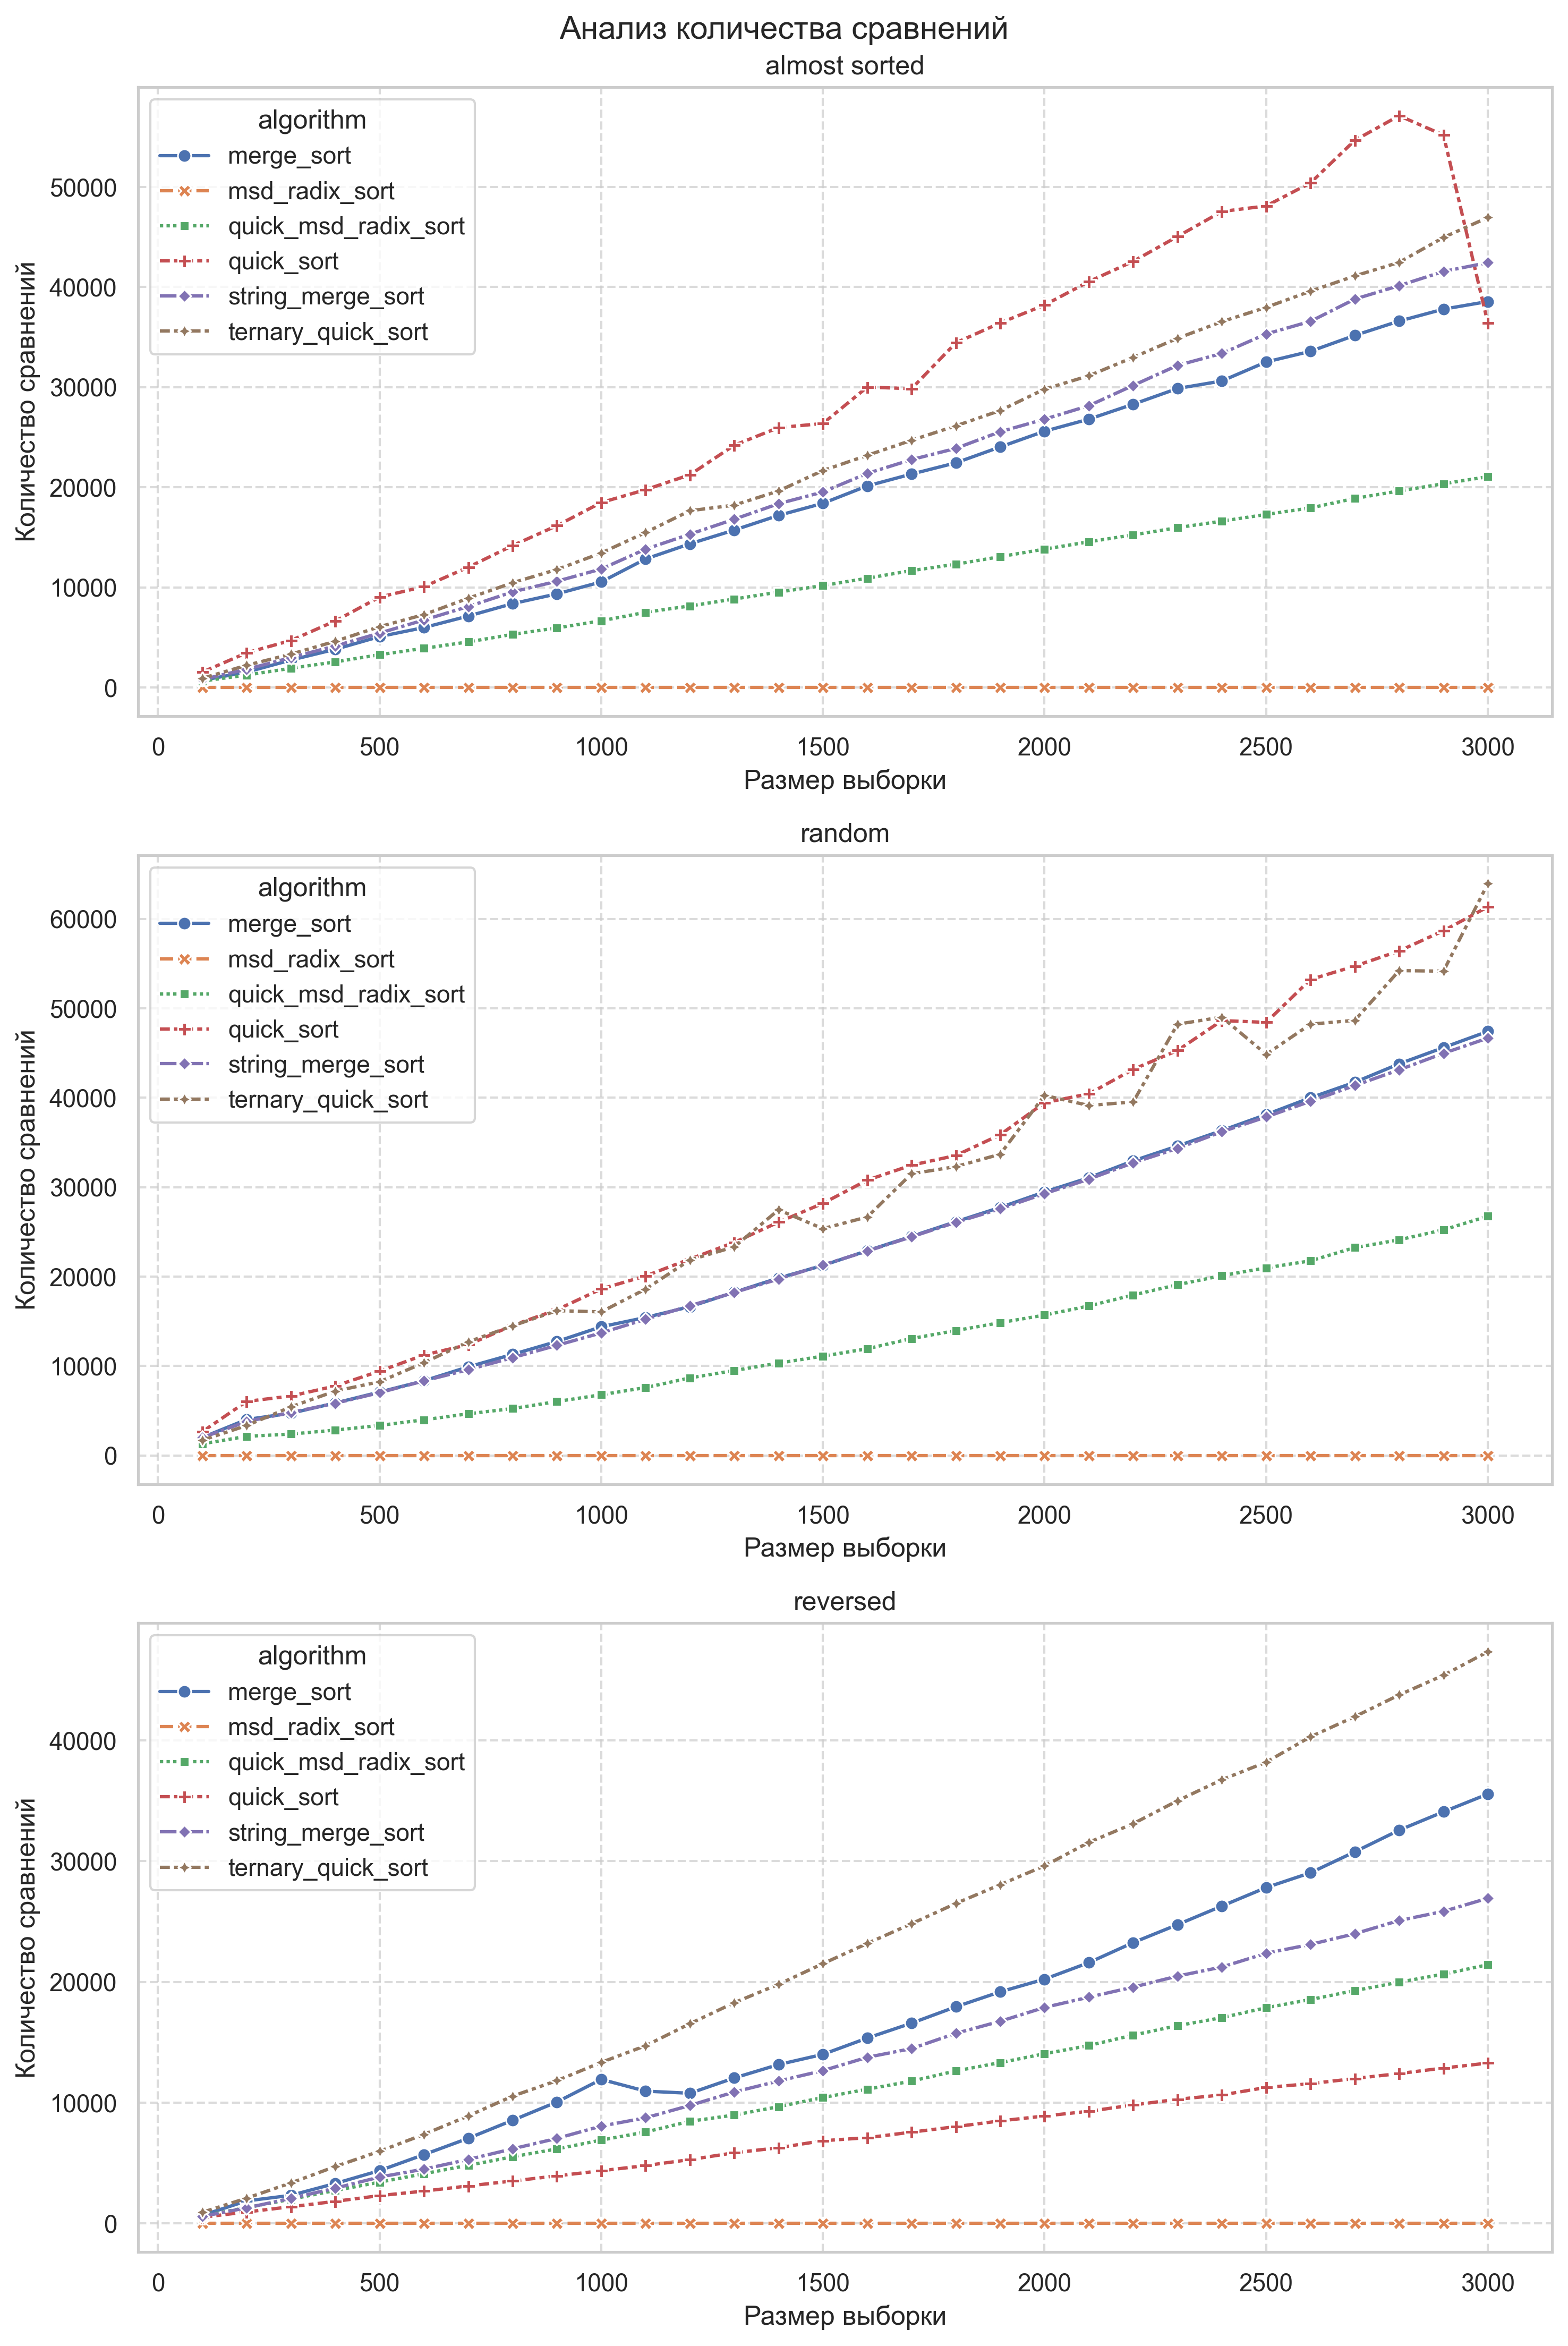

In [67]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15), dpi=300)
sns.set_theme(style="whitegrid")

sample_types = df["dataset"].unique()

for ax, sample_type in zip(axes, sample_types):
    subset = df[df["dataset"] == sample_type]

    sns.lineplot(
        data=subset,
        x="size",
        y="comparisons",
        hue="algorithm",
        style="algorithm",
        markers=True,
        errorbar=None,
        ax=ax
    )

    ax.set_title(f"{sample_type.replace('_', ' ')}")
    ax.set_xlabel("Размер выборки")
    ax.set_ylabel("Количество сравнений")
    ax.grid(True, linestyle='--', alpha=0.7)

plt.suptitle("Анализ количества сравнений")
plt.tight_layout()
plt.show()

Построение графика зависимости времени сортировки от размера выборки для разных алгоритмов и разных типов выборок.

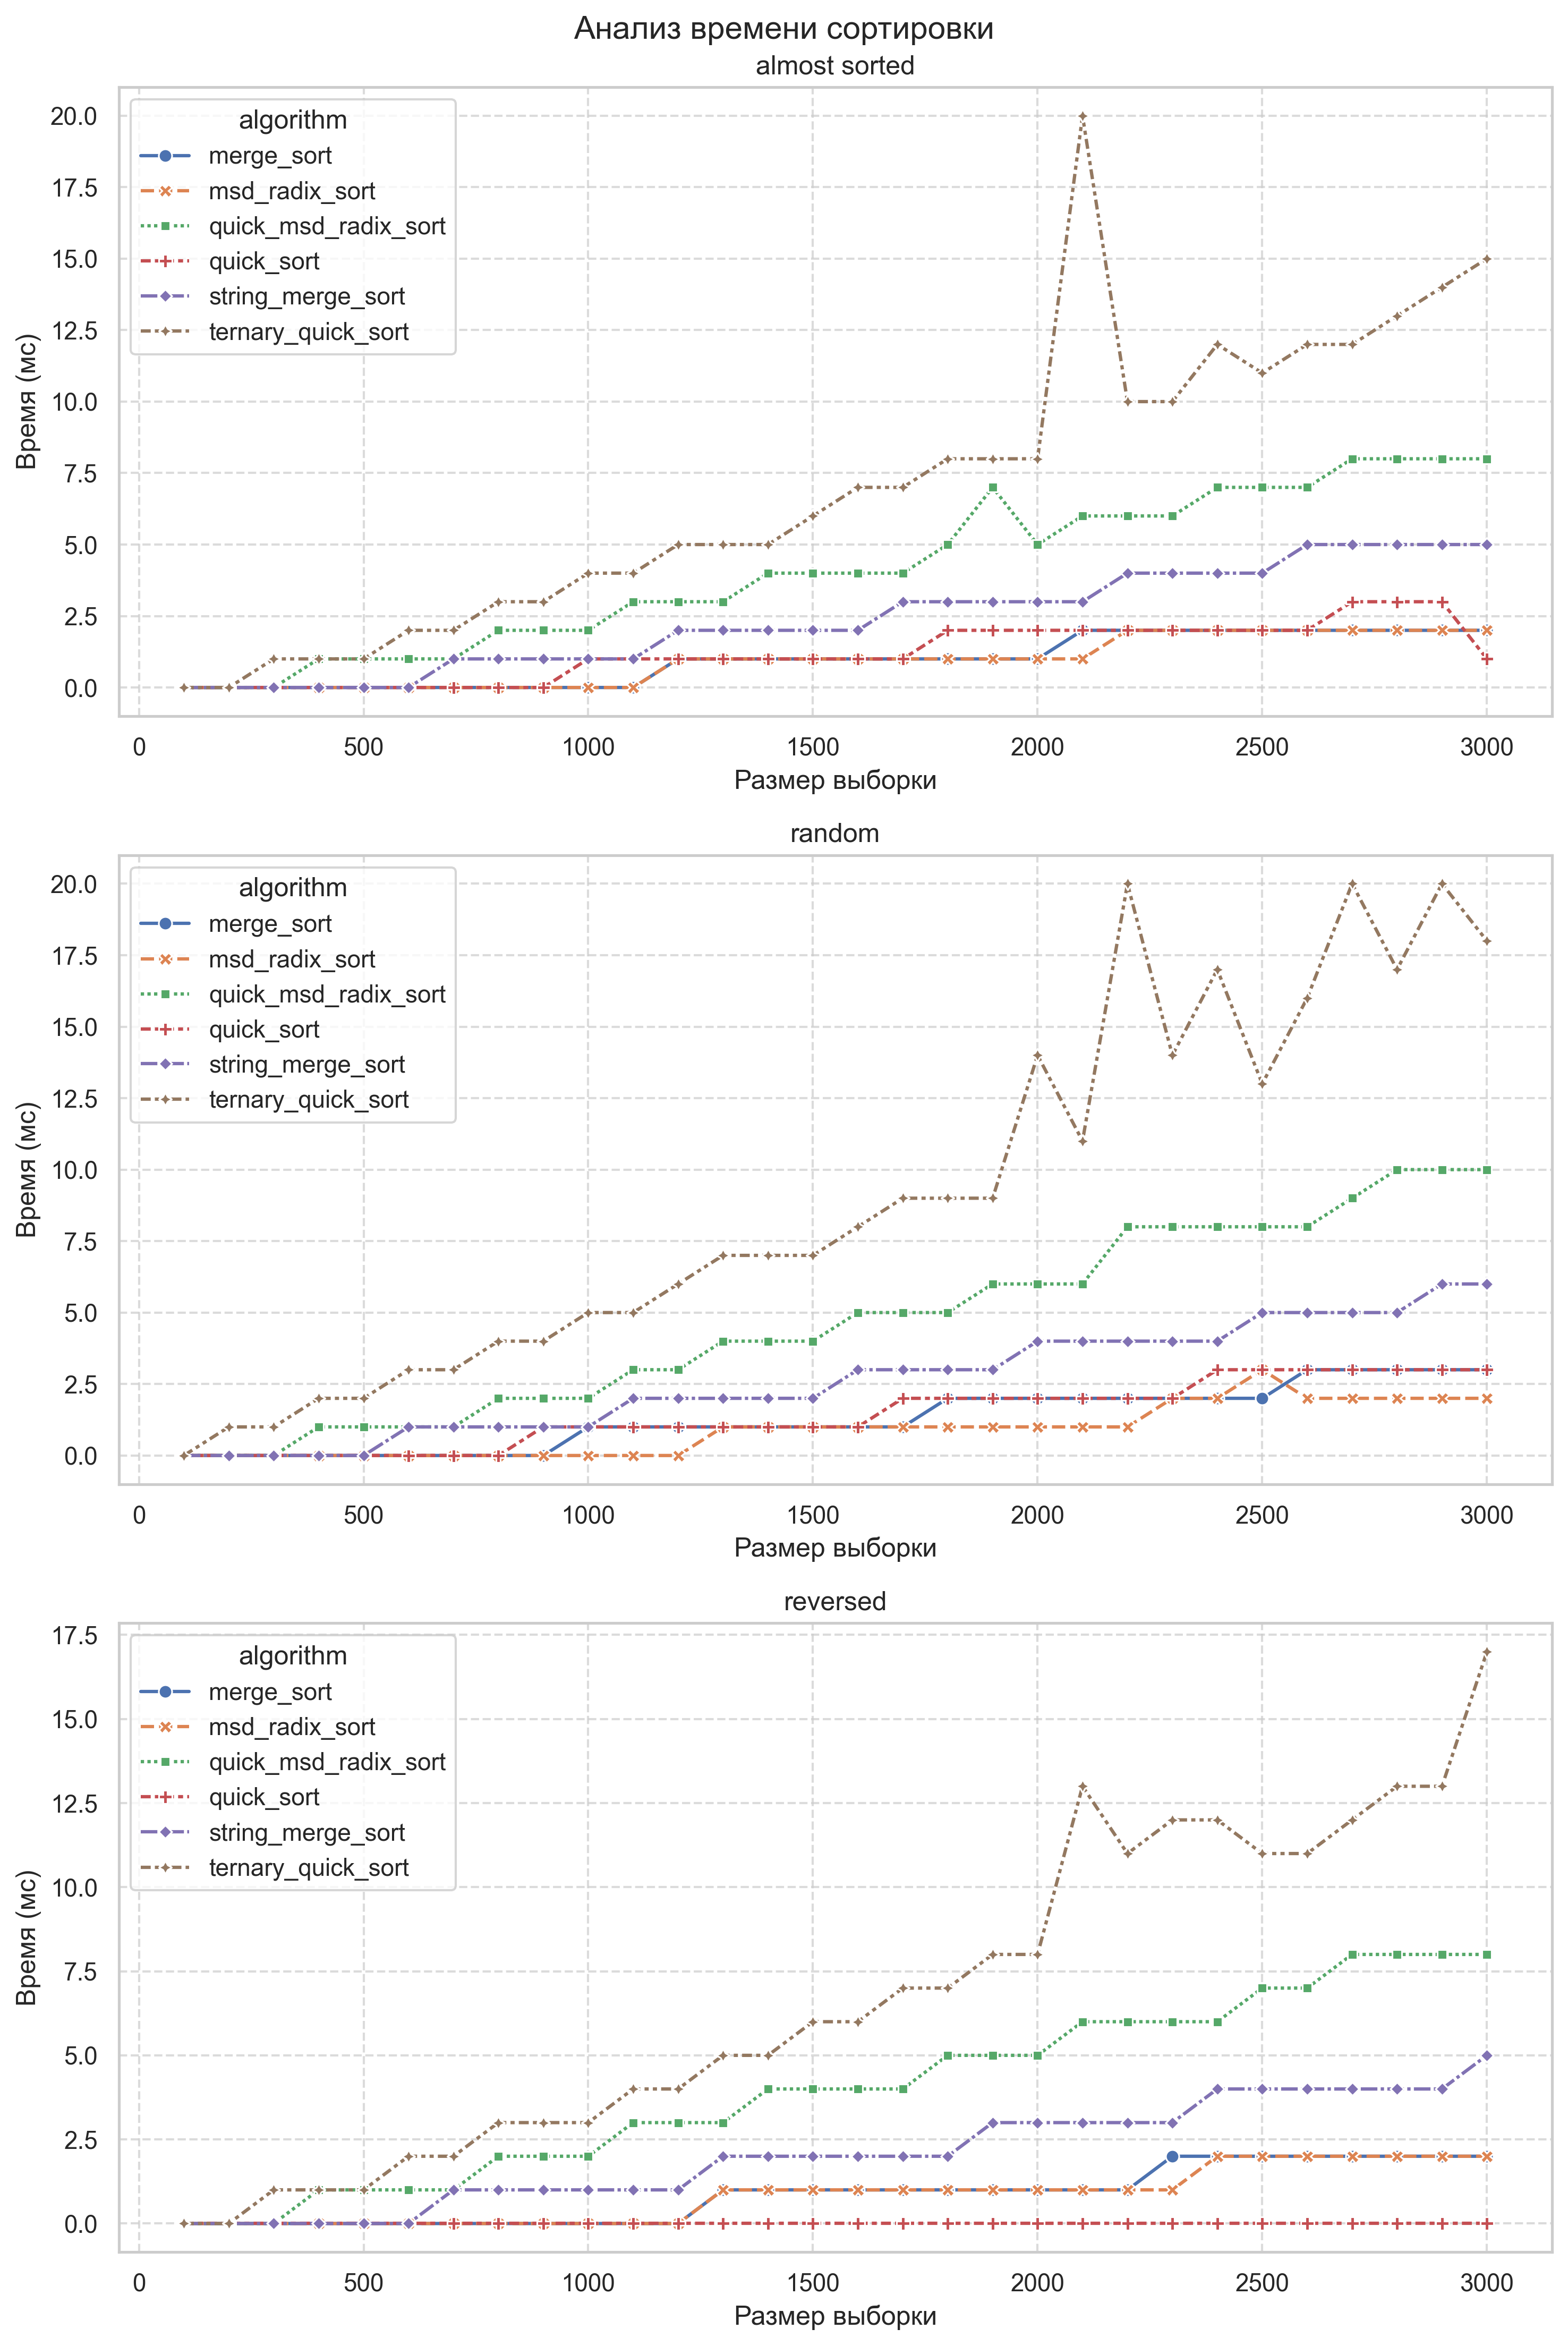

In [68]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15), dpi=300)
sns.set_theme(style="whitegrid")

sample_types = df["dataset"].unique()

for ax, sample_type in zip(axes, sample_types):
    subset = df[df["dataset"] == sample_type]

    sns.lineplot(
        data=subset,
        x="size",
        y="time",
        hue="algorithm",
        style="algorithm",
        markers=True,
        errorbar=None,
        ax=ax
    )

    ax.set_title(f"{sample_type.replace('_', ' ')}")
    ax.set_xlabel("Размер выборки")
    ax.set_ylabel("Время (мс)")
    ax.grid(True, linestyle='--', alpha=0.7)

plt.suptitle("Анализ времени сортировки")
plt.tight_layout()
plt.show()